## Import Libraries:

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## Load the CSV Files:

In [4]:
import os

# Function to read multiple CSV files from a directory
def read_csv_files(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Read all CSV files for races from the "Races" folder
races = read_csv_files(r"C:\Users\Selvam\Downloads\Horse_race_prediction\Dataset\races")

# Read all CSV files for horses from the "Horses" folder
horses = read_csv_files(r"C:\Users\Selvam\Downloads\Horse_race_prediction\Dataset\horses")

# Read the single CSV file for forward data
forward = pd.read_csv(r"C:\Users\Selvam\Downloads\Horse_race_prediction\Dataset\forward.csv")

# Display the first few rows of each dataset
print(races.head())
print(horses.head())
print(forward.head())

C:\Users\Selvam\AppData\Local\Temp\ipykernel_11100\4091322775.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
C:\Users\Selvam\AppData\Local\Temp\ipykernel_11100\4091322775.py:9: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


      rid         course   time      date  \
0  271018         Exeter  03:15  90/01/01   
1  275156  Tramore (IRE)  02:00  90/01/01   
2  282203      Catterick  02:45  90/01/01   
3  298761     Cheltenham  02:30  90/01/01   
4  301118        Windsor  03:30  90/01/01   

                                               title rclass   band   ages  \
0  David Garrett Memorial Challenge Trophy Novice...    NaN    NaN  6-8yo   
1              Tattersalls Mares E.B.F. Novice Chase    NaN    NaN    NaN   
2                       Scotch Corner Handicap Chase    NaN  0-125    NaN   
3                           A. S. W. Handicap Hurdle    NaN    NaN    NaN   
4                        Touchen End Handicap Hurdle    NaN  0-115    NaN   

  distance     condition    hurdles                          prizes  \
0     3m1f          Soft  19 fences   [2922.5, 875.0, 420.0, 192.5]   
1       2m          Soft  12 fences                              []   
2    1m7½f  Good To Firm  12 fences          [2238.0,

## Data Cleaning

In [5]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid                 0
course              0
time                0
date                0
title               1
rclass         152992
band           231309
ages            13054
distance            0
condition          48
hurdles        274953
prizes              0
winningTime         0
prize           19708
metric              0
countryCode         0
ncond               0
class               0
currency       387291
dtype: int64

Missing values in Horses DataFrame:
rid                   0
horseName             0
age                 309
saddle           179168
decimalPrice          0
isFav                 0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
overWeight      4012988
outHandicap     3994332
headGear        3119695
RPR              864877
TR              1681610
OR              1795263
father             1289
mother           

In [6]:
# Dropping specified columns from races DataFrame
races.drop(columns=['rclass', 'band', 'hurdles', 'currency', 'ages' , 'prize'], inplace=True)

# Dropping specified columns from horses DataFrame
horses.drop(columns=['price', 'headGear', 'TR', 'OR', 'outHandicap', 'overWeight' ,'saddle', 'RPR' , 'dist' , 'positionL' , 'gfather' ,'price'], inplace=True)

# Dropping specified columns from forward DataFrame
forward.drop(columns=['OR', 'TRc', 'RPRc', 'rclass'], inplace=True)

In [7]:
# Calculate the mode of the 'condition' column
mode_condition = races['condition'].mode()[0]

# Fill null values in the 'condition' column with the mode value
races['condition'].fillna(mode_condition, inplace=True)

In [8]:
# Fill null values in the 'age' column using mean
mean_age = horses['age'].mean()
horses['age'].fillna(mean_age, inplace=True)

# Fill null values in the specified columns using mode
mode_columns = ['mother', 'father', 'jockeyName', 'trainerName']
for column in mode_columns:
    mode_value = horses[column].mode()[0]
    horses[column].fillna(mode_value, inplace=True)

In [9]:
# Fill null values in the specified columns using mode
mode_columns = ['course', 'condition', 'jockeyName']
for column in mode_columns:
    mode_value = forward[column].mode()[0]
    forward[column].fillna(mode_value, inplace=True)

In [10]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid            0
course         0
time           0
date           0
title          1
distance       0
condition      0
prizes         0
winningTime    0
metric         0
countryCode    0
ncond          0
class          0
dtype: int64

Missing values in Horses DataFrame:
rid             0
horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weightSt        0
weightLb        0
father          0
mother          0
runners         0
margin          0
weight          0
res_win         0
res_place       0
dtype: int64

Missing values in Forward DataFrame:
course          0
countryCode     0
marketTime      0
title           0
runners         0
condition       0
prize           0
horseName       0
trainerName     0
jockeyName      0
weightSt        0
weightLb        0
age             0
decimalPrice    0
dtype: int64


## Merge Datasets:

In [11]:
# Merge the race and horse datasets on the 'rid' column
merged_data = pd.merge(races, horses, on='rid')

In [12]:
column_names = merged_data.columns
print(column_names)

Index(['rid', 'course', 'time', 'date', 'title', 'distance', 'condition',
       'prizes', 'winningTime', 'metric', 'countryCode', 'ncond', 'class',
       'horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weightSt', 'weightLb', 'father', 'mother',
       'runners', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')


In [13]:
# Optimize data types to reduce memory usage
def optimize_memory(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

# Optimize merged_data DataFrame
merged_data = optimize_memory(merged_data)

## Exploratory Data Analysis (EDA)

In [14]:
# Descriptive statistics
print(merged_data.describe())

                rid  winningTime     metric         class        age  \
count  4.107315e+06  4107315.000  4107315.0  4.107315e+06  4107315.0   
mean   2.079191e+05          NaN        NaN  2.521013e+00        NaN   
std    1.199290e+05          NaN        NaN  2.375500e+00        0.0   
min    0.000000e+00        0.000      804.0  0.000000e+00      -17.0   
25%    1.036025e+05       88.500     1407.0  0.000000e+00        3.0   
50%    2.086340e+05      131.500     2011.0  3.000000e+00        4.0   
75%    3.117560e+05      253.875     3318.0  5.000000e+00        6.0   
max    4.150900e+05     5552.000     7340.0  7.000000e+00       27.0   

       decimalPrice         isFav      position      weightSt      weightLb  \
count  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
mean            NaN  1.044334e-01  8.532958e+00  9.237648e+00  6.141118e+00   
std    0.000000e+00  3.058220e-01  9.464667e+00  1.159235e+00  4.154006e+00   
min    7.991791e-04  0.000000e+00  

In [15]:
merged_data.head()

,rid,course,time,date,title,distance,condition,prizes,winningTime,metric,...,position,weightSt,weightLb,father,mother,runners,margin,weight,res_win,res_place
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.25,5028.0,...,1,11,0,Absalom,Queen's Parade,14,1.521484,69,1.0,1.0
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.25,5028.0,...,2,11,0,Norfolk Air,All At Sea,14,1.521484,69,0.0,1.0
2,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.25,5028.0,...,3,10,7,Sousa,Just Camilla,14,1.521484,66,0.0,1.0
3,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.25,5028.0,...,4,11,0,Mandalus,Indictment,14,1.521484,69,0.0,0.0
4,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.25,5028.0,...,5,11,0,Fair Turn,Shuil Alainn,14,1.521484,69,0.0,0.0


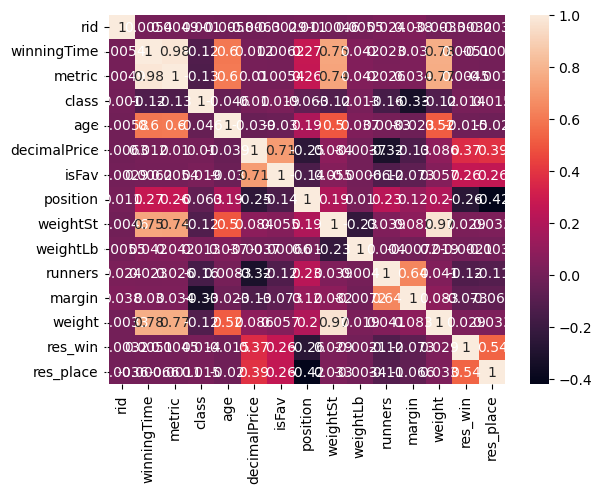

In [16]:
# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

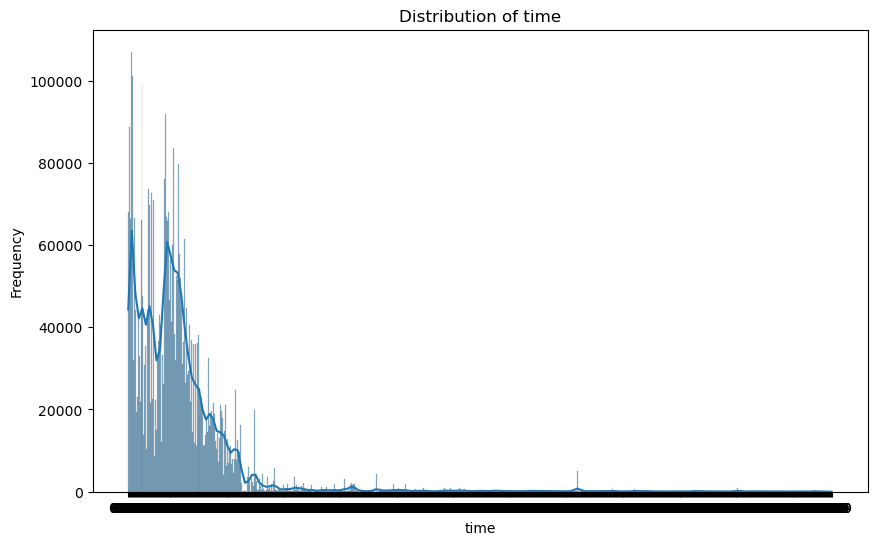

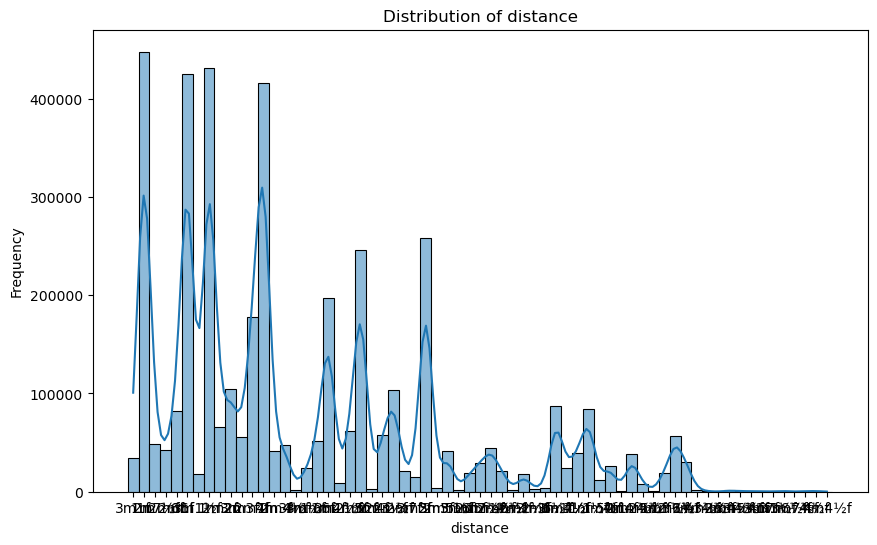

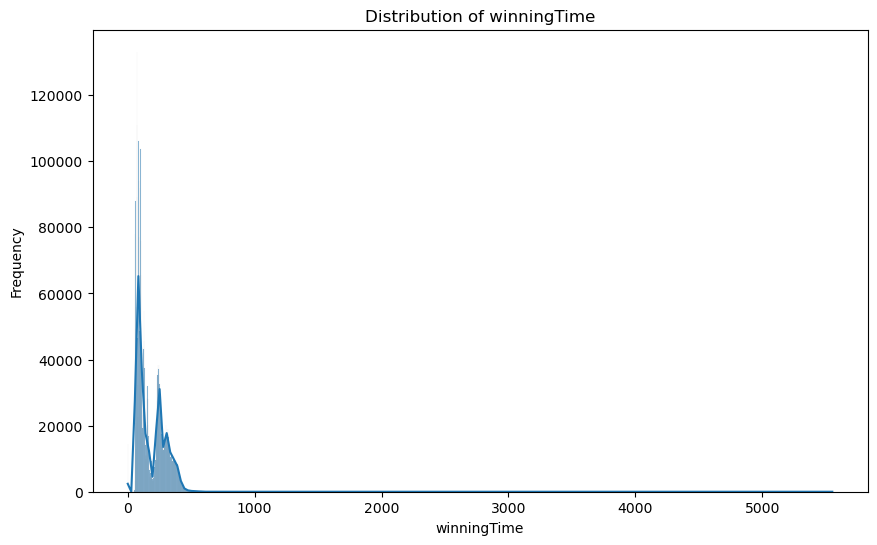

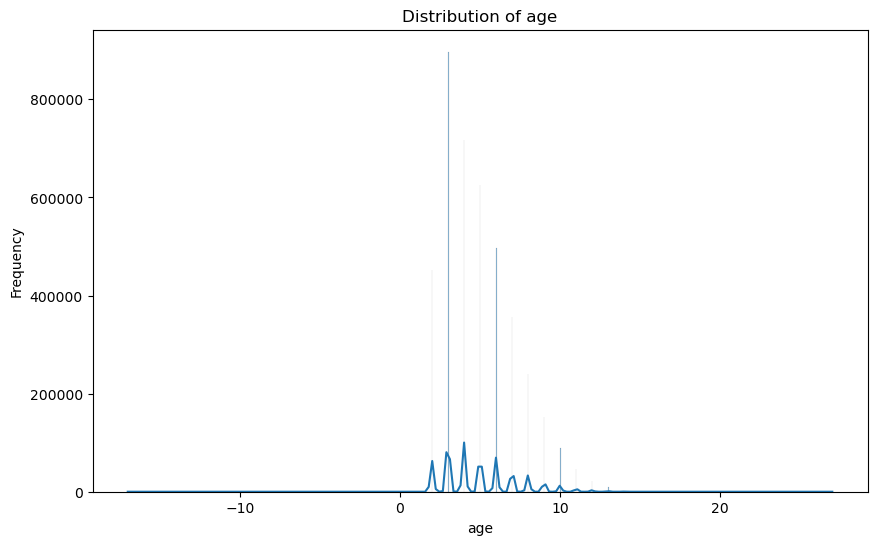

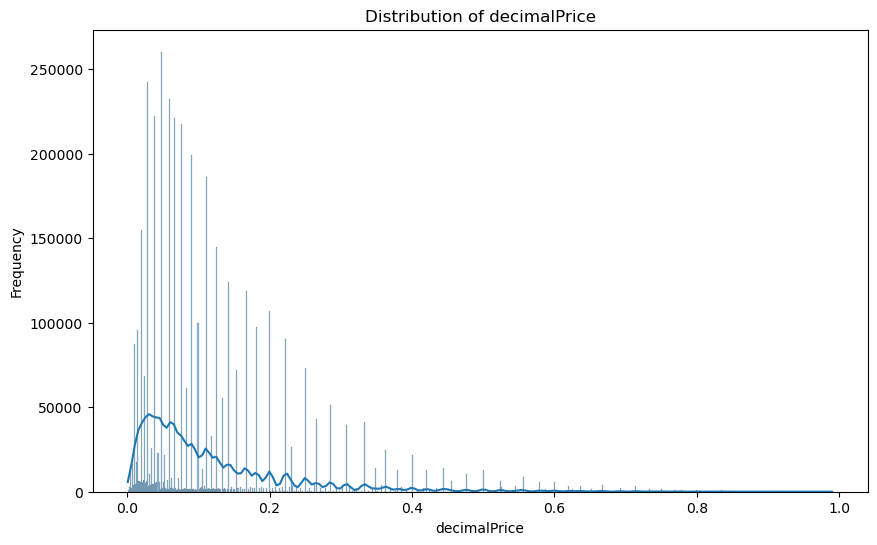

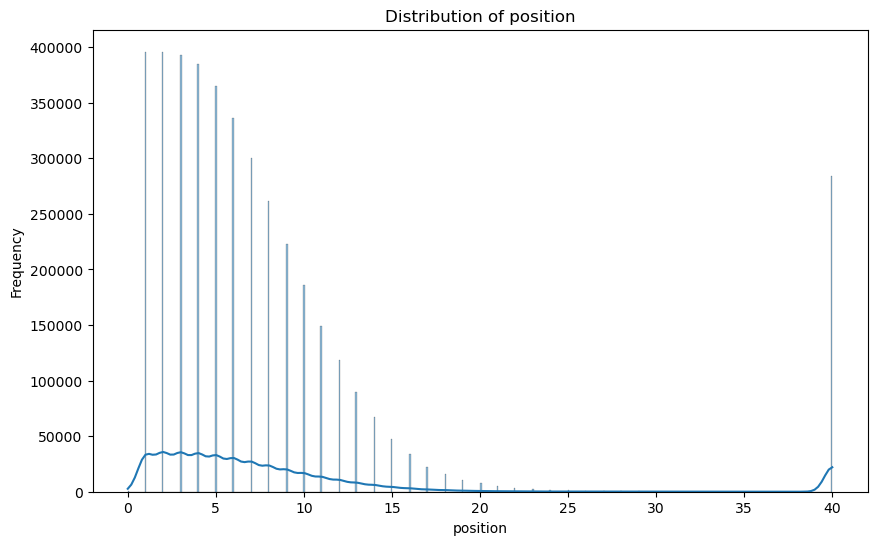

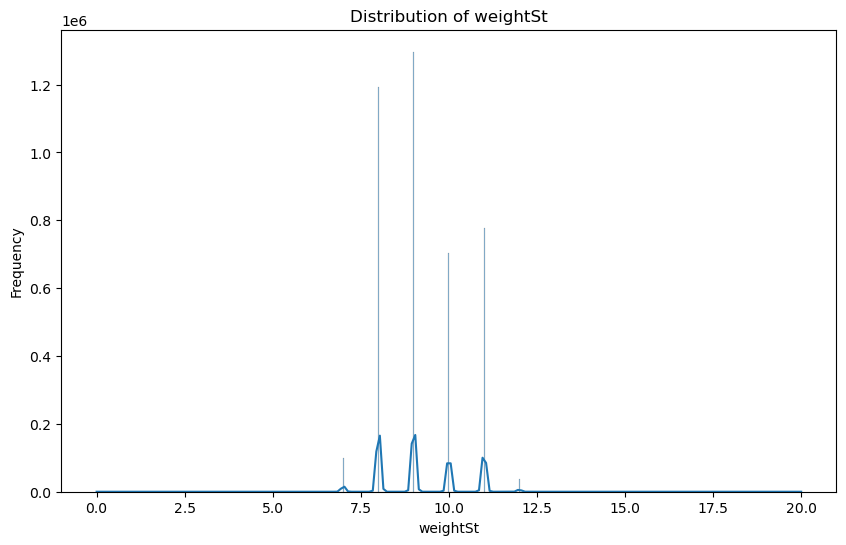

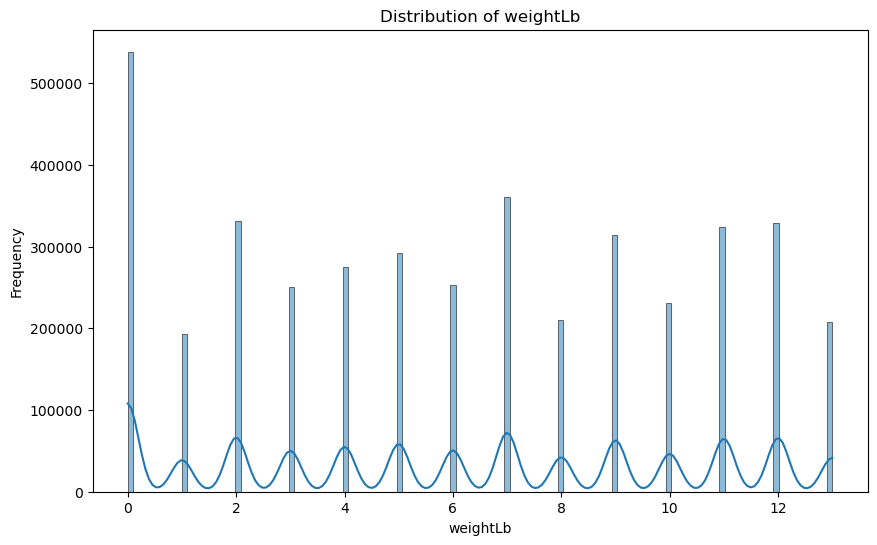

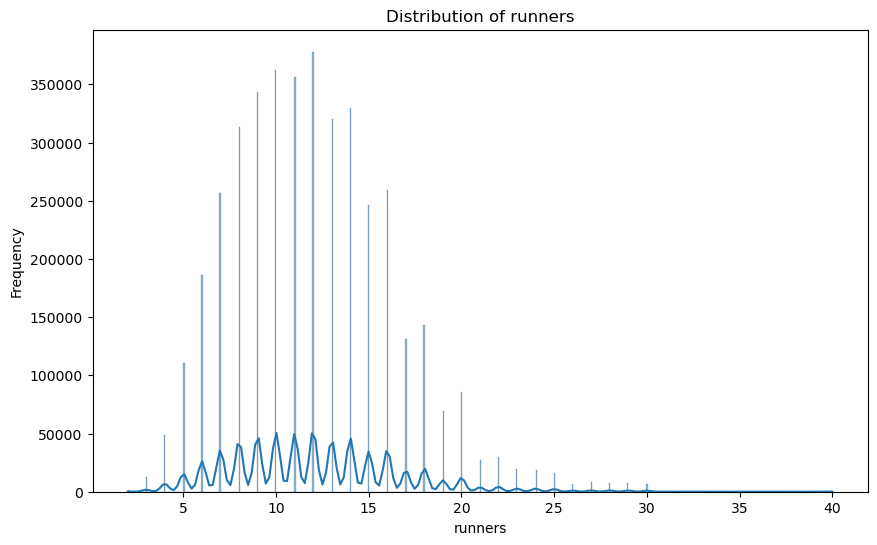

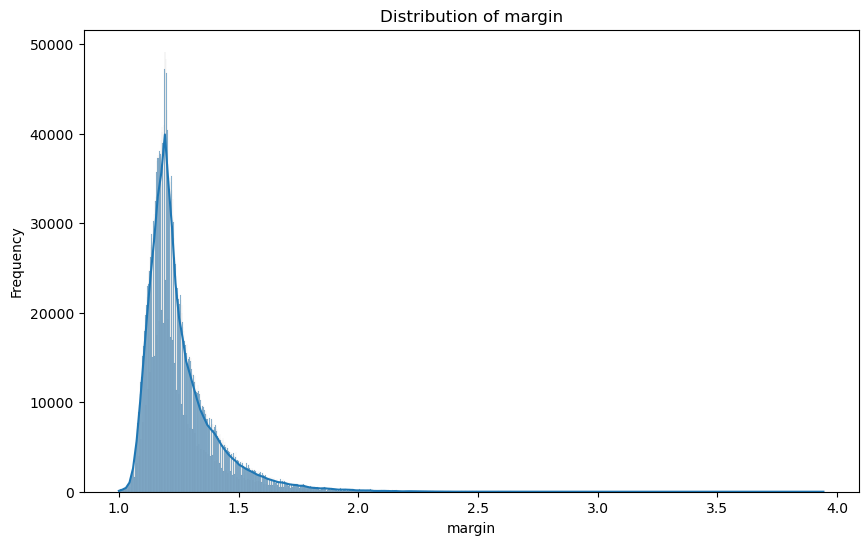

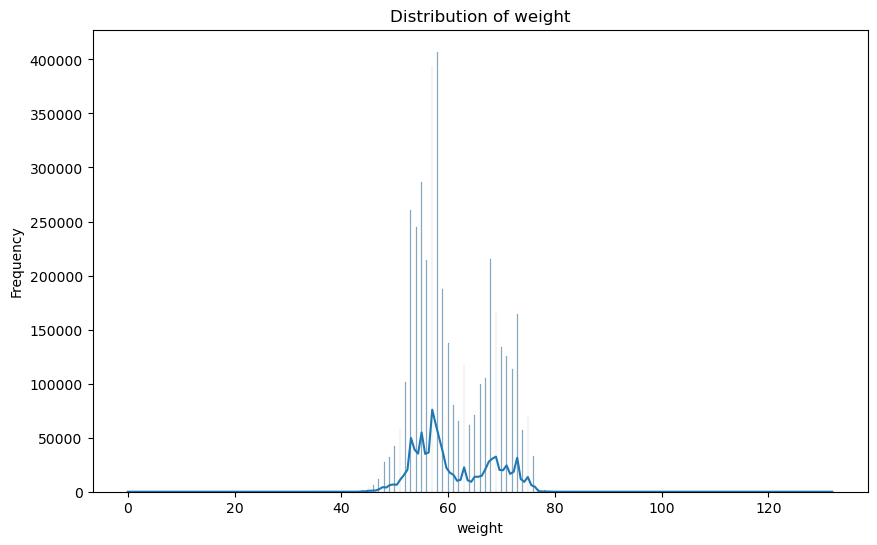

In [17]:
# Assuming merged_data is your DataFrame
continuous_vars = ['time', 'distance', 'winningTime', 'age', 'decimalPrice', 'position', 'weightSt', 'weightLb', 'runners', 'margin', 'weight']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Scatter Plots, Histograms, and Box Plots to Visualize Data Distribution

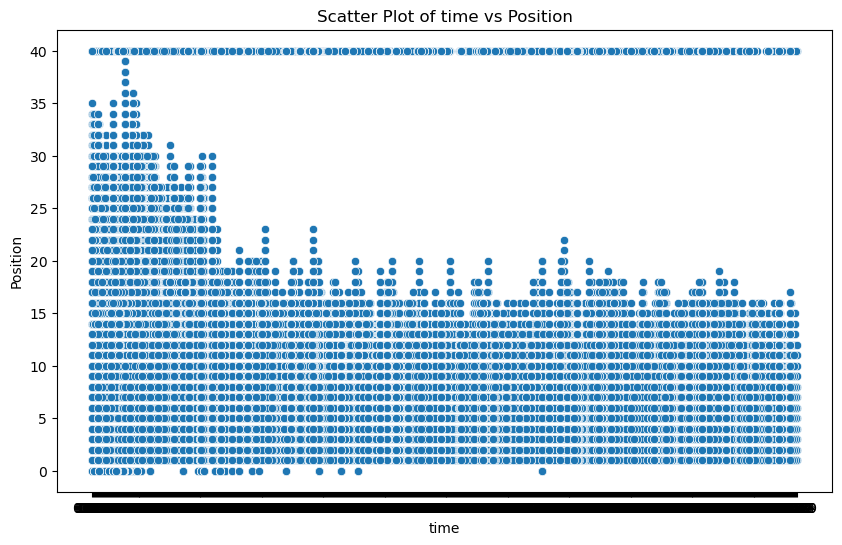

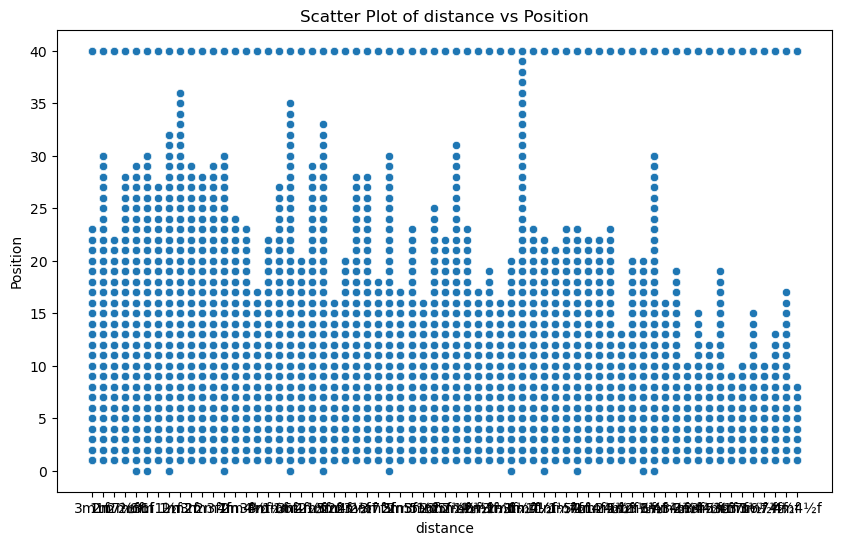

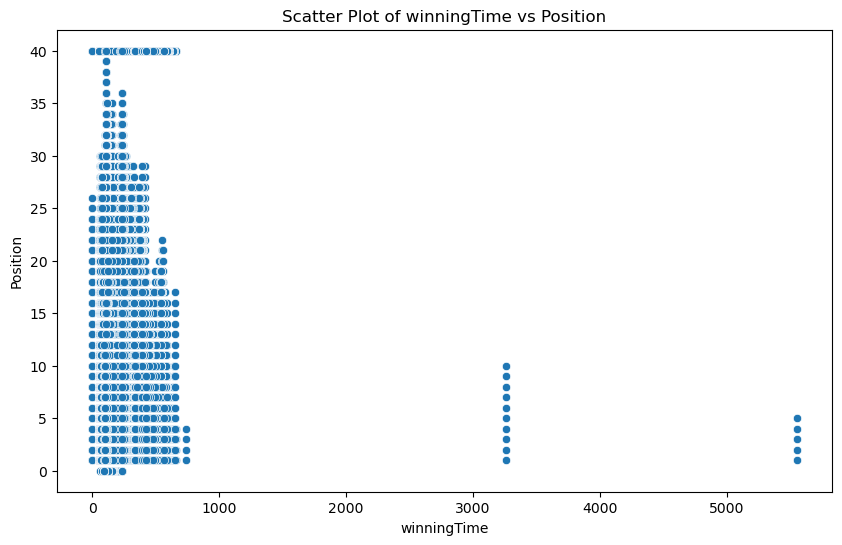

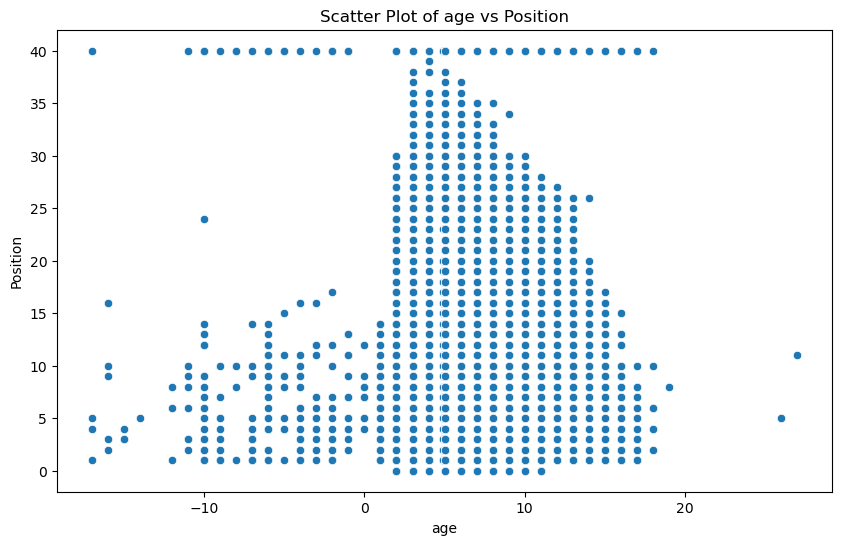

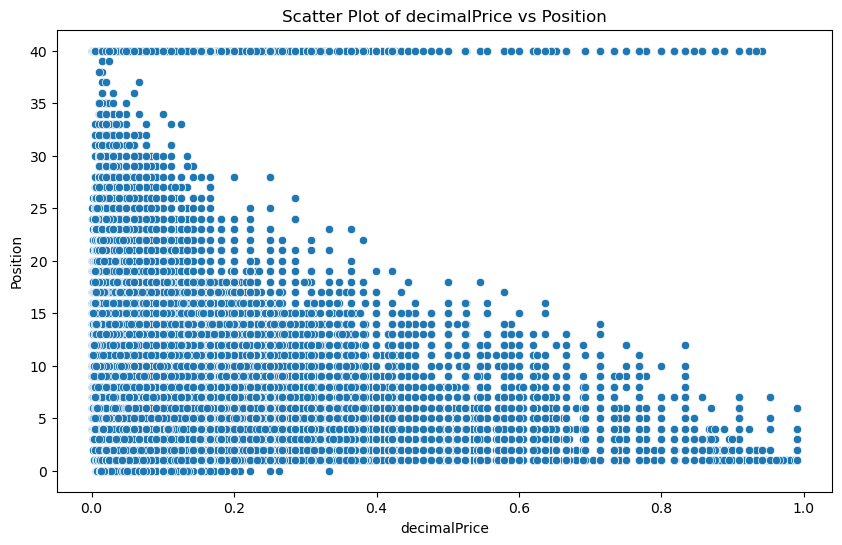

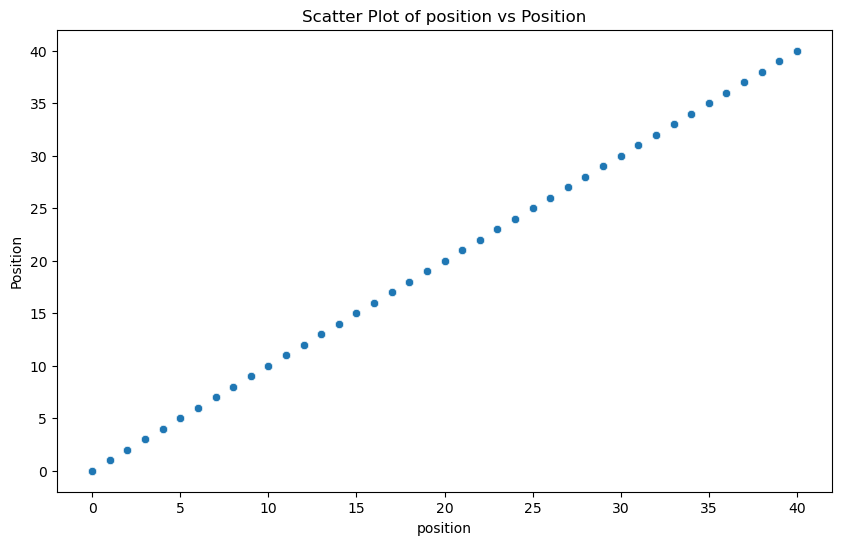

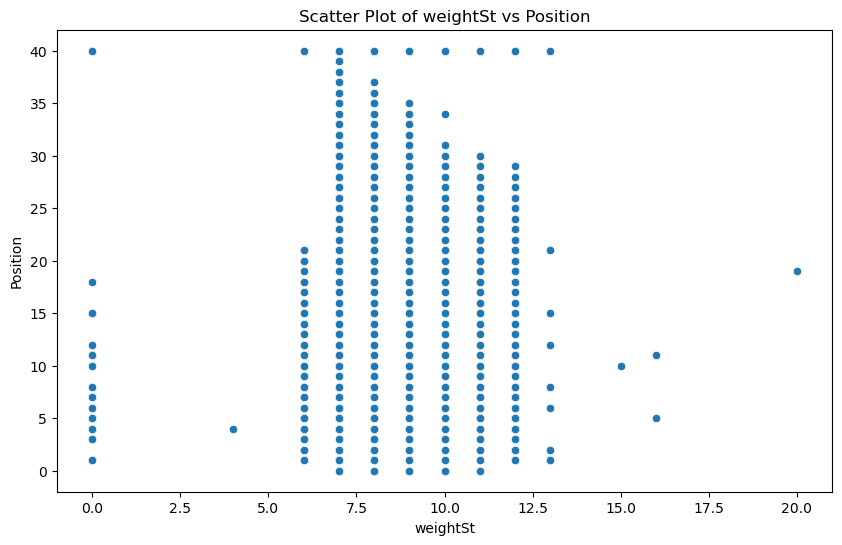

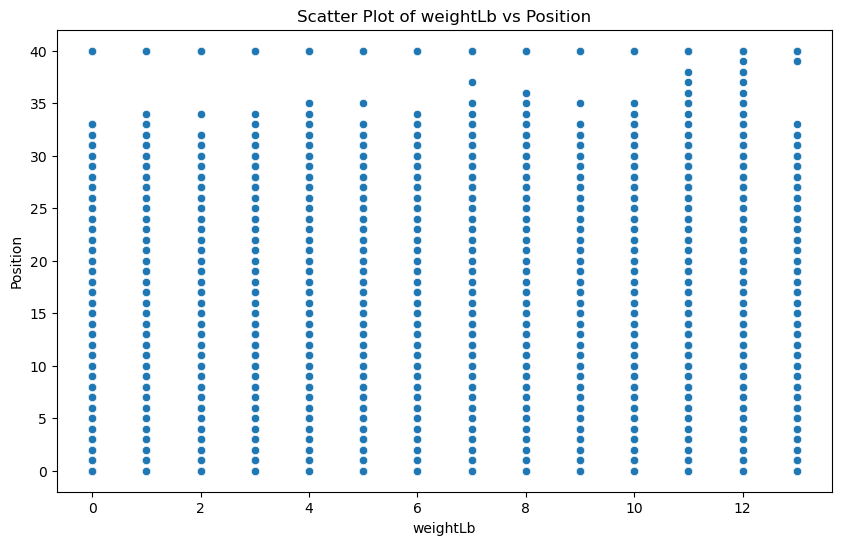

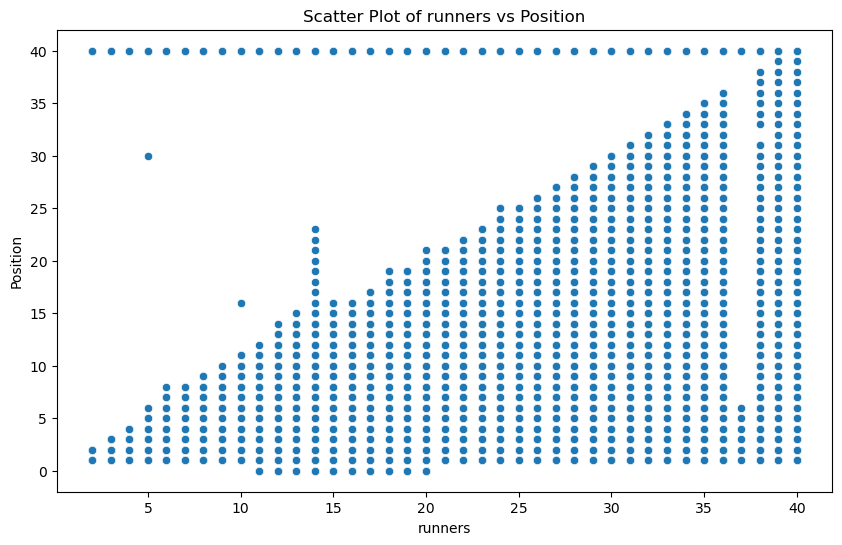

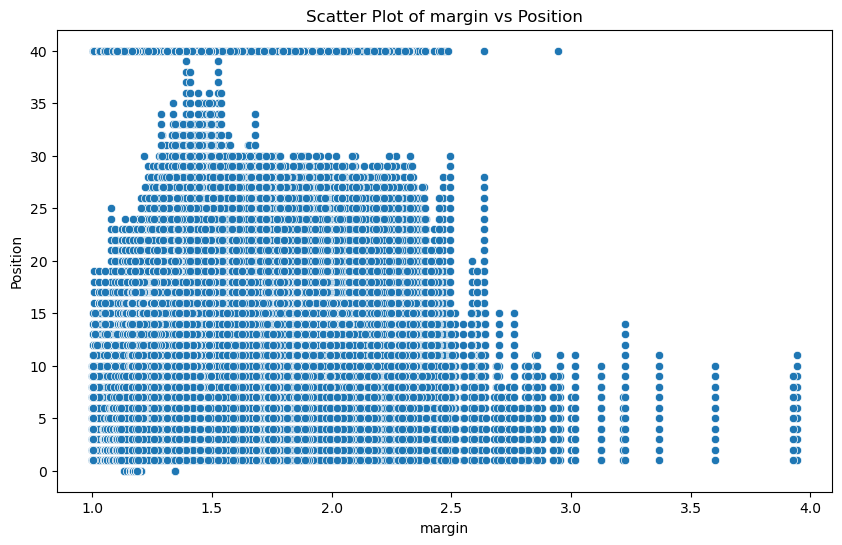

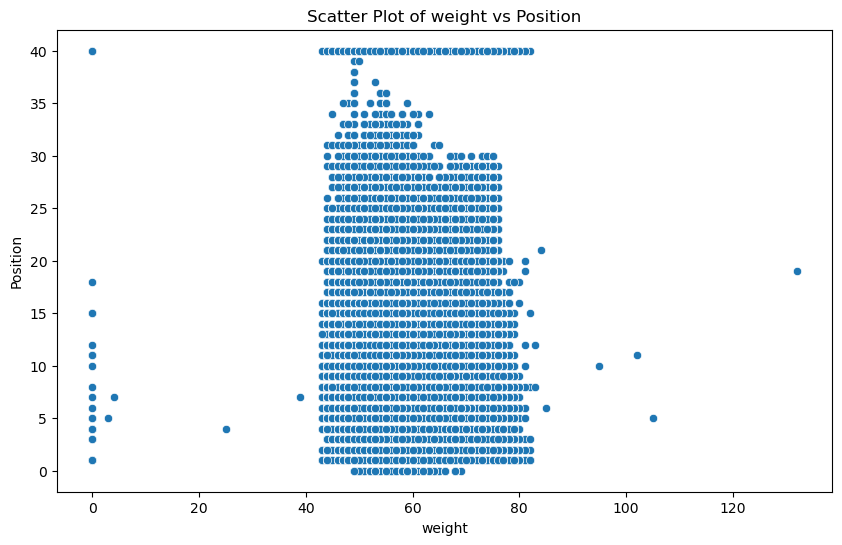

In [18]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_data[var], y=merged_data['position'])
    plt.title(f'Scatter Plot of {var} vs Position')
    plt.xlabel(var)
    plt.ylabel('Position')
    plt.show()

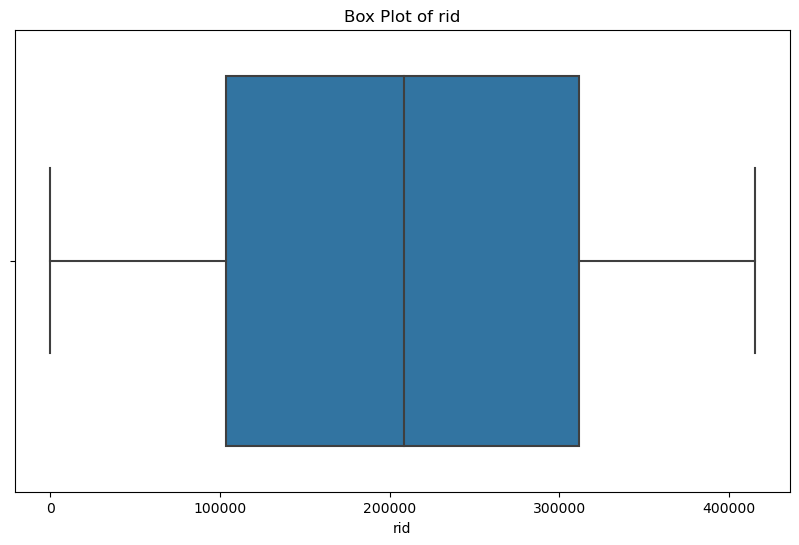

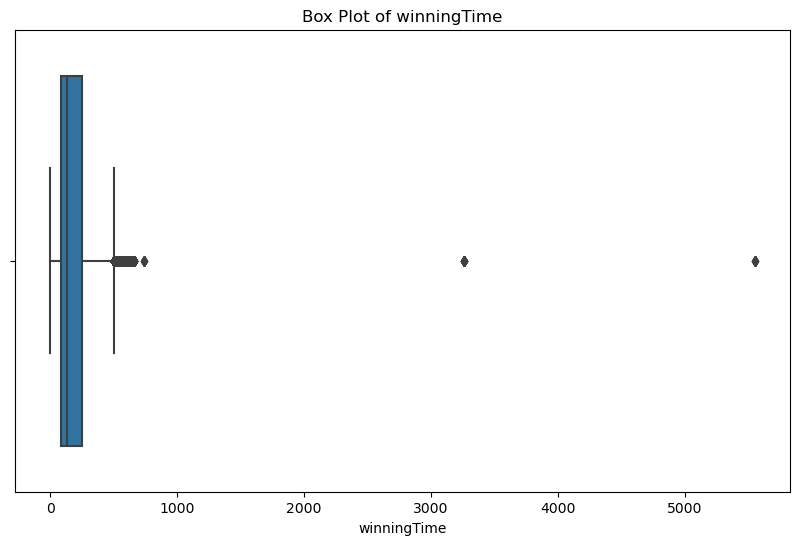

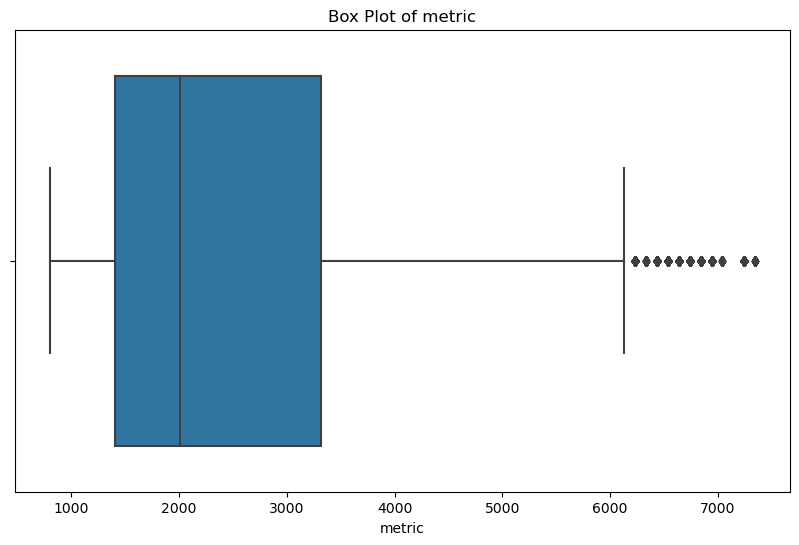

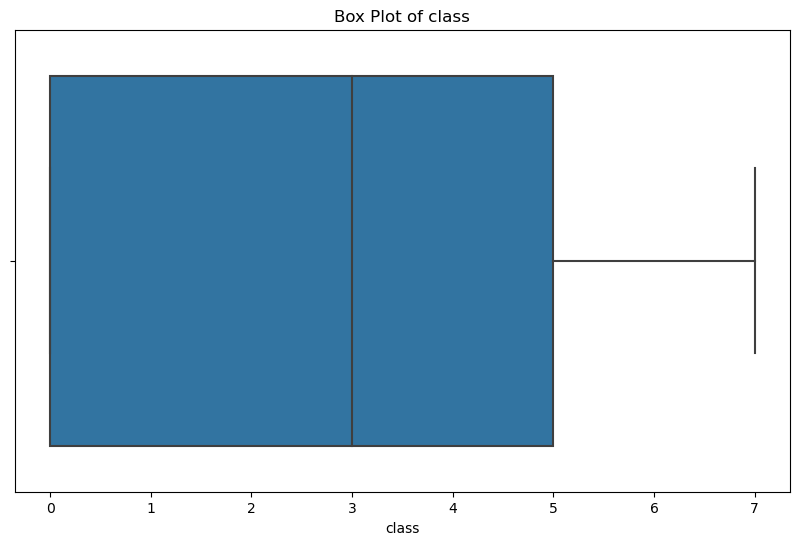

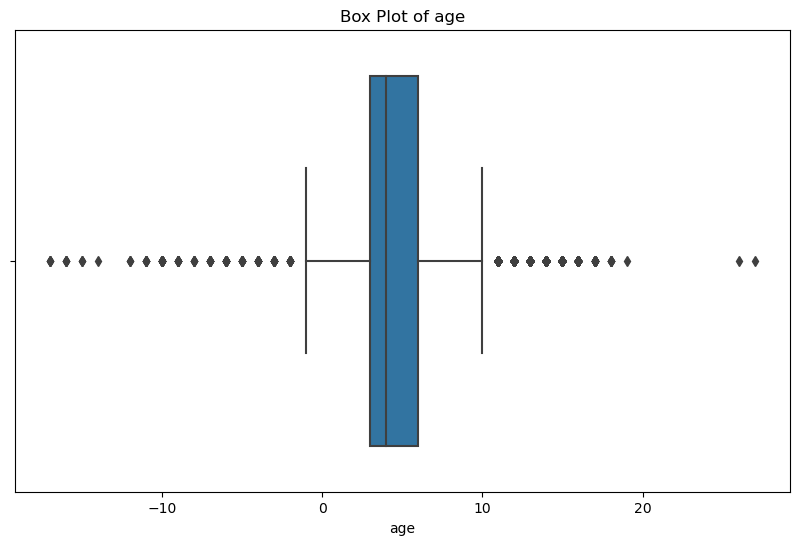

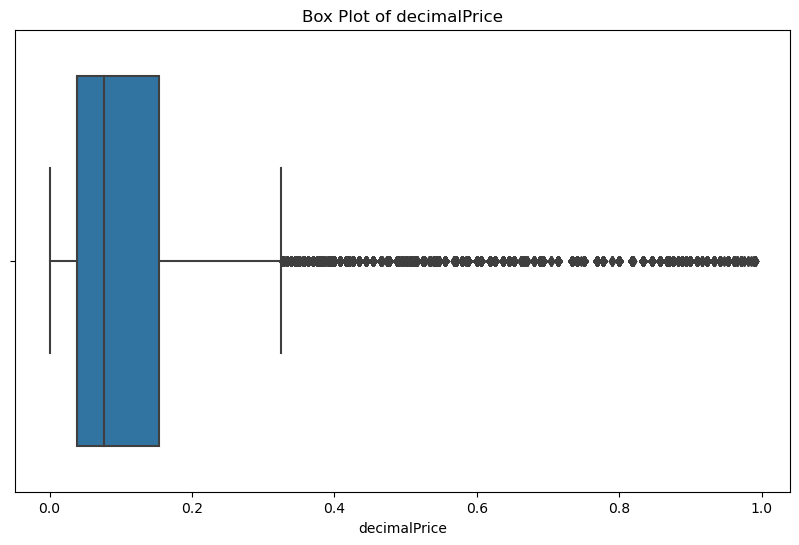

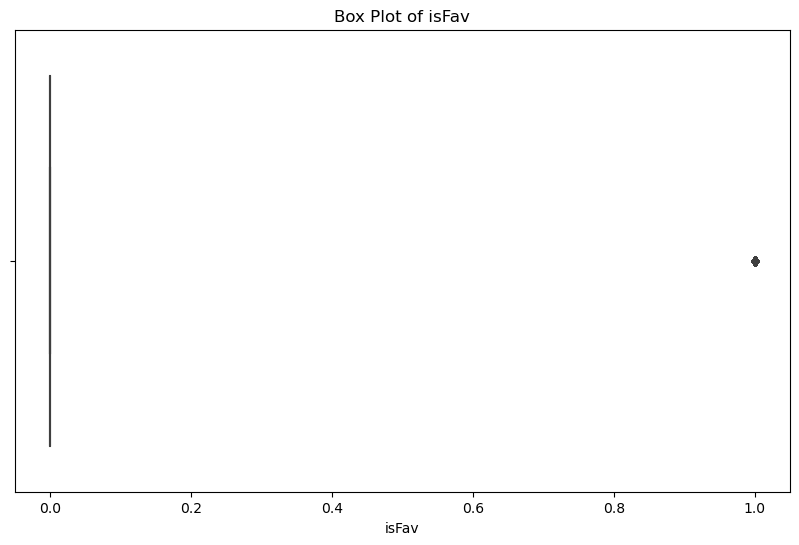

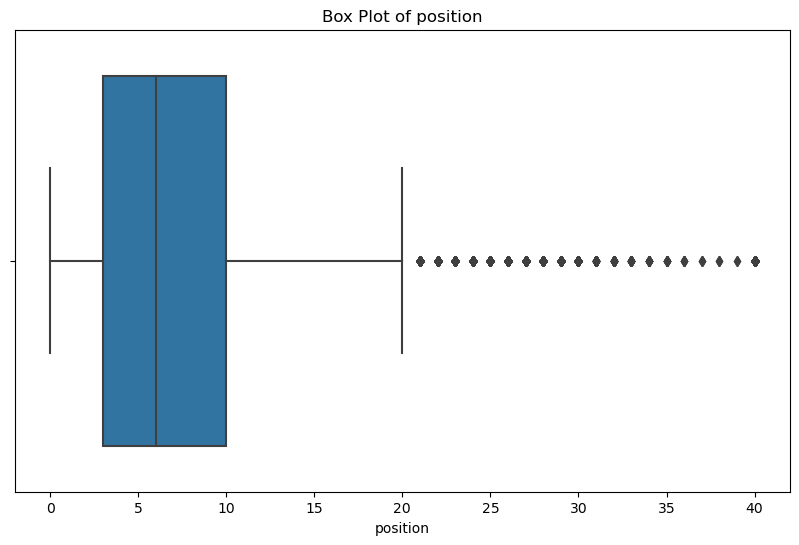

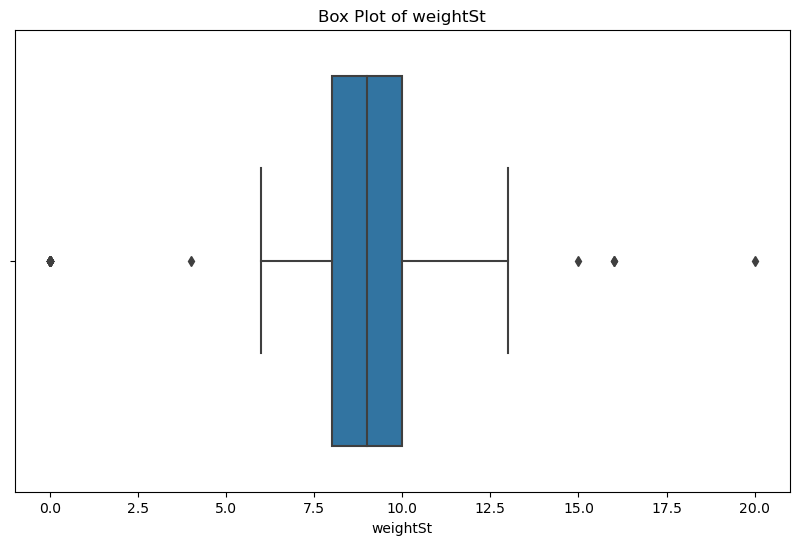

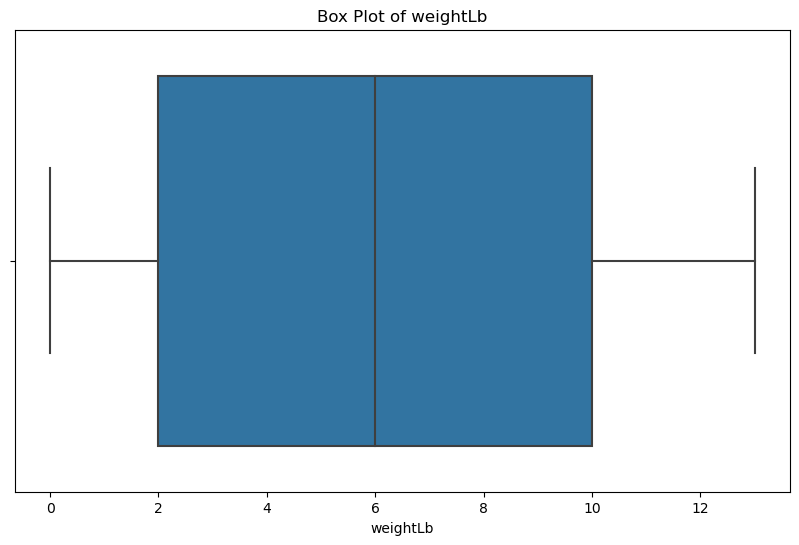

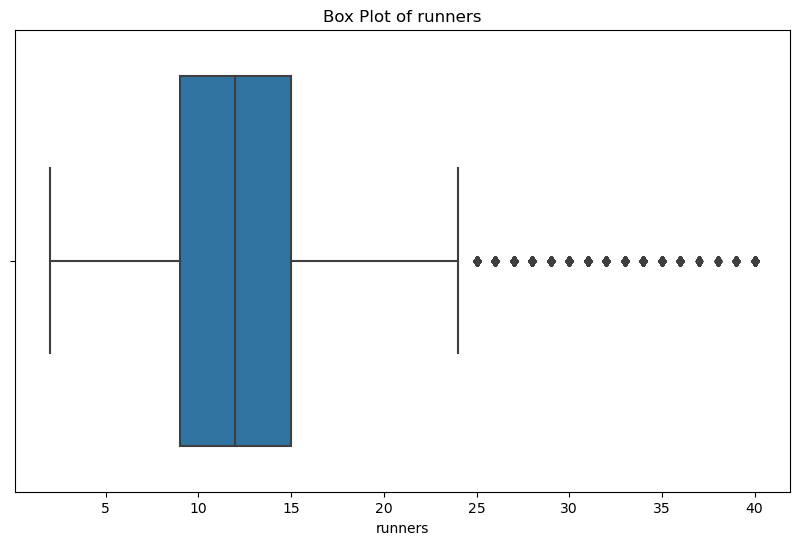

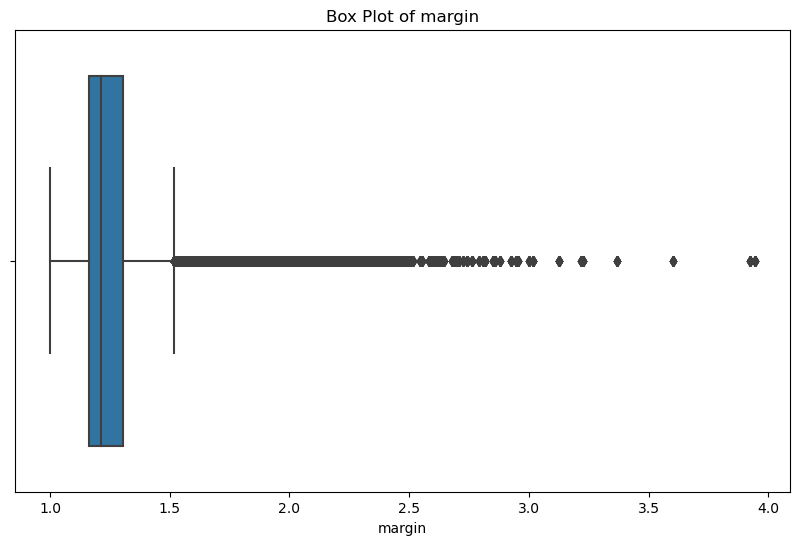

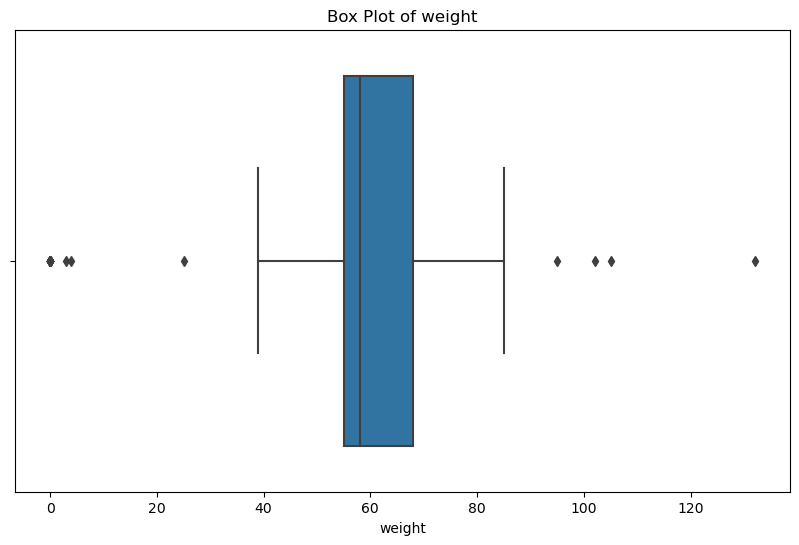

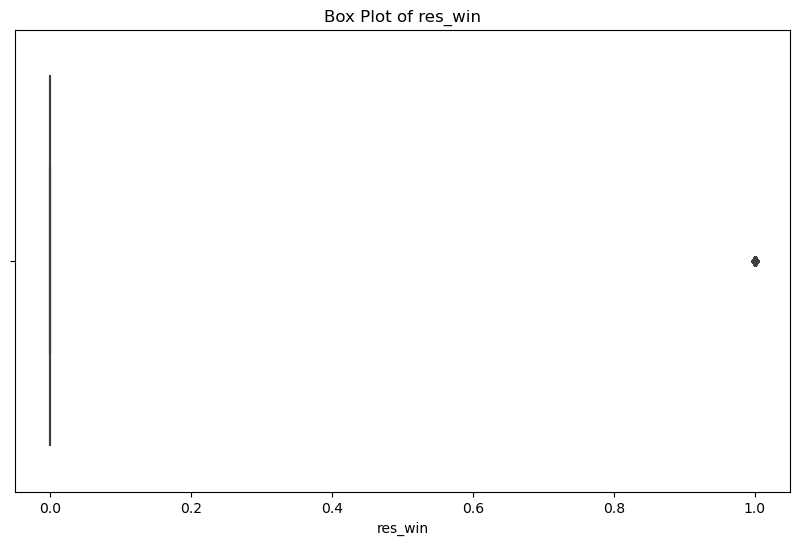

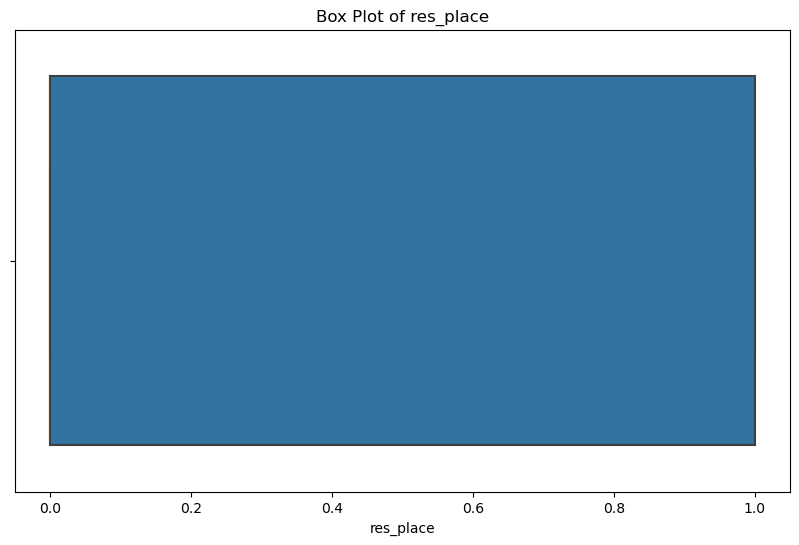

In [19]:
continuous_vars = merged_data.select_dtypes(include=np.number).columns

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_data[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()


In [20]:
print(merged_data[continuous_vars].dtypes)


rid               int32
winningTime     float16
metric          float16
class              int8
age             float16
decimalPrice    float16
isFav              int8
position           int8
weightSt           int8
weightLb           int8
runners            int8
margin          float16
weight            int16
res_win         float16
res_place       float16
dtype: object


## Split the Data

In [21]:
# Convert 'time' and 'distance' columns to numeric
merged_data['time'] = pd.to_numeric(merged_data['time'], errors='coerce')
merged_data['distance'] = pd.to_numeric(merged_data['distance'], errors='coerce')

In [22]:
# Selecting relevant continuous features and the target variable
continuous_vars = ['time', 'distance', 'winningTime', 'age', 'decimalPrice', 
                   'weightSt', 'weightLb', 'runners', 'margin', 'weight']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(merged_data[continuous_vars])
y = merged_data['position']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=1)

In [24]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3696583, 8)
X_test shape: (410732, 8)
y_train shape: (3696583,)
y_test shape: (410732,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")

Train MSE: 75.2199
Test MSE: 74.6990
Train R^2: 0.1607
Test R^2: 0.1628


In [26]:
## Perform Cross-Validation Manually

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Initialize lists to store performance metrics for each fold
mse_scores = []
r2_scores = []

# Initialize the model
model = LinearRegression()

# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred_fold = model.predict(X_test_fold)

    # Calculate performance metrics
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)

    # Append the metrics to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold MSE: {mse:.4f}")
    print(f"Fold R^2: {r2:.4f}")

# Calculate the average performance metrics across all folds
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage MSE: {average_mse:.4f}")
print(f"Average R^2: {average_r2:.4f}")


Fold MSE: 74.8889
Fold R^2: 0.1619
Fold MSE: 75.1924
Fold R^2: 0.1608
Fold MSE: 75.2401
Fold R^2: 0.1594
Fold MSE: 75.0829
Fold R^2: 0.1609
Fold MSE: 75.4380
Fold R^2: 0.1613

Average MSE: 75.1685
Average R^2: 0.1609
